In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')



In [33]:
import csv

with open('results/labels_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predClasses_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predEntropy_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)
    

In [101]:
import csv

with open('results/labels.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predClasses.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predEntropy.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)

In [47]:
import csv

with open('results/labels_alt6.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predClasses_alt6.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predEntropy_alt6.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)

In [48]:
def exitAccuracy(results, labels, classes=[]):
    """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
    """    
    print("number of classes {}".format(len(classes)))
    print("correct answer {}".format(results.sum()))

    classAcc = {}
    correct =[]
    count = []
    percentage = []
    if len(classes) > 0:
        for i, labelClass in enumerate(classes):            
            correct.append(results[np.where(labels==labelClass)].sum())
            count.append(len(labels[np.where(labels == labelClass)]))
#             try:
            p = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
#             except expression as identifier:
#                 p = 0 
            percentage.append(p)
            classAcc[labelClass] = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
    else: 
        correct.append(results.sum())
        count.append((len(labels)))
        p = results.sum()/len(labels)
        percentage.append(p)
        classAcc["all"] = p
    avgAcc = results.sum()/len(labels)
    
        
    print("correct {}".format(correct))
    print("count {}".format(count))
    print("percentage {}".format(percentage))

    return avgAcc, classAcc


In [49]:
def findMainExitAccuracies(pred, labels, num_outputs, labelClasses=[], output_names=[],graph=True):
        """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
        """
        results = np.equal(pred, labels)
        pred = np.array(pred)
        print(pred.dtype)
        
        labels = np.array(labels)
        
        transpose_results = np.transpose(results) #truths
        transpose_preds = np.transpose(pred) #per exit rather then per input
        transpose_labels = np.transpose(labels)
        # %matplotlib inline
        if graph==True:
            plt.style.use('seaborn-whitegrid')
            fig = plt.figure()
            fig.tight_layout()
            fig.set_size_inches(18.5, 10.5, forward=True)
        df =  pd.DataFrame() 
        print("correct answers {}".format(transpose_results[0].sum()))
        print("passed results {}".format(len(transpose_results[0])))
        avgAcc, classAcc= exitAccuracy(transpose_results[0],transpose_labels[0],labelClasses)
#         print(avgAcc)
        fig, ax = plt.subplots()
        ticks = []
        if graph==True:
            for i, x in enumerate(classAcc):
                ticks.append(x)
#                 print(x)                
                plt.bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
                if classAcc[x] != 0:
                    if type(x) != str:
                        plt.text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
                    else: 
                        plt.text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, avgAcc, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                plt.hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Accuracy", linestyles="dashed", alpha=0.5)
                plt.text(len(classAcc.keys())-.5, .74, ' Avg Acc%', ha='left', va='center')
            
    #     print(sum(classAcc.values())/len(classAcc.values()))
        if graph==True:
            plt.xticks(ticks)
            plt.title("Class Label Accuracy")
            plt.ylabel("Accuracy %")
            plt.xlabel("Label Class #")
            plt.show()
        return classAcc

float64
correct answers 835
passed results 1000
number of classes 0
correct answer 835
correct [835]
count [1000]
percentage [0.835]


<Figure size 1332x756 with 0 Axes>

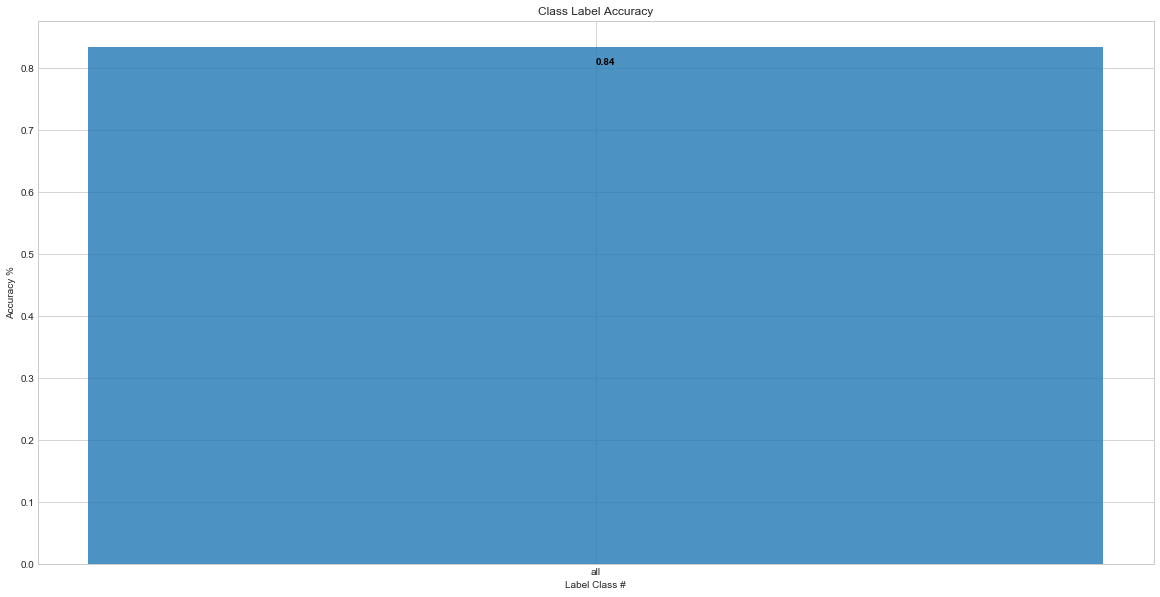

In [50]:

y = findMainExitAccuracies(pred, labels, 4,[], ["dense5","pooling_3","pooling_4","dense_3"])


float64
correct answers 835
passed results 1000
number of classes 10
correct answer 835
correct [68, 79, 72, 68, 73, 73, 103, 96, 100, 103]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.6601941747572816, 0.8876404494382022, 0.72, 0.6601941747572816, 0.8111111111111111, 0.8488372093023255, 0.9196428571428571, 0.9411764705882353, 0.9433962264150944, 0.944954128440367]


<Figure size 1332x756 with 0 Axes>

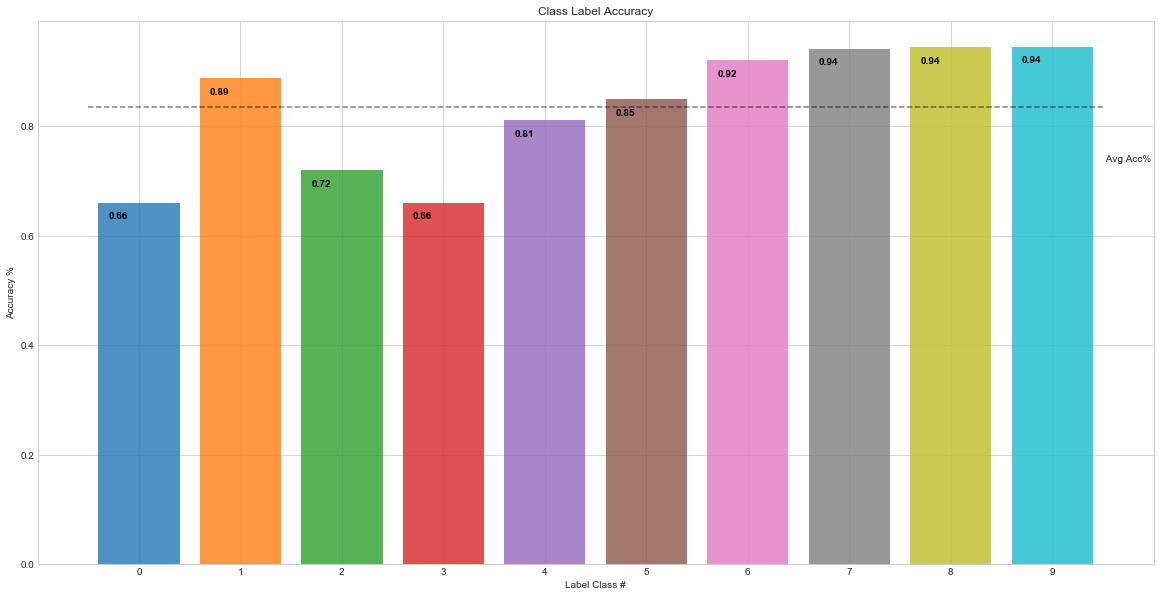

In [51]:
plt.rcParams["figure.figsize"] = (20,10)
y = findMainExitAccuracies(pred, labels, 4,list(range(10)), ["dense5","pooling_3","pooling_4","dense_3"])

In [52]:

def graphclassAccuracy(pred, labels, num_outputs, classes, output_names=[],graph=True):
    """ finds the class accuracies of the main exit and the branches.
    """
       
        
#           print(sum(classAcc.values())/len(classAcc.values()))
   
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    if graph==True:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
        ticks = []
        series=[]
    df =  pd.DataFrame() 
    returnData = []
    print("label classes{}".format(labelClasses))
    for i in range(num_outputs):
        print("output: {}".format(i))

        avgAcc, classAcc= exitAccuracy(transpose_results[i],transpose_labels[i],labelClasses)
        if graph==True:
            for j, x in enumerate(classAcc):
                ticks.append(x)
#                 print(classAcc[x])       
                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
                axs[round(int(i/2)), round(i%2)].bar(x, classAcc[x], label="Class: {}".format(x),alpha=0.8) 
#                 if type(x) != str:
#                     axs[round(int(i/2)), round(i%2)].text(x-.3, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 else: 
#                     axs[round(int(i/2)), round(i%2)].text(x, classAcc[x]-0.025, "{}".format(round(classAcc[x],2)), color='black', va='center', fontweight='bold')
#                 plt.bar(x, .74, label="Avg Accuracy",alpha=0.8,bottom=classAcc[x]) 
            if len(labelClasses) > 0:
                axs[round(int(i/2)), round(i%2)].hlines(avgAcc,-.5,len(classAcc.keys())-.5,label ="Avg Acc", linestyles="dashed", alpha=0.5)
#                 axs[round(int(i/2)), round(i%2)].text(len(classAcc.keys())-.5, .74, ' Avg Acc', ha='left', va='center')
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
    #     print(sum(classAcc.values())/len(classAcc.values()))
            
    if graph==True:        
        lines = []
        labels = []
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Label Class #', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')

        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
        plt.setp(axs, xticks=ticks, xticklabels=ticks)
#         plt.xticks(ticks)
        plt.show()
#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

label classes[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output: 0
number of classes 10
correct answer 835
correct [68, 79, 72, 68, 73, 73, 103, 96, 100, 103]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.6601941747572816, 0.8876404494382022, 0.72, 0.6601941747572816, 0.8111111111111111, 0.8488372093023255, 0.9196428571428571, 0.9411764705882353, 0.9433962264150944, 0.944954128440367]
output: 1
number of classes 10
correct answer 750
correct [0, 76, 72, 62, 66, 74, 102, 95, 101, 102]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.0, 0.8539325842696629, 0.72, 0.6019417475728155, 0.7333333333333333, 0.8604651162790697, 0.9107142857142857, 0.9313725490196079, 0.9528301886792453, 0.9357798165137615]
output: 2
number of classes 10
correct answer 767
correct [0, 80, 68, 69, 74, 74, 100, 96, 102, 104]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.0, 0.898876404494382, 0.68, 0.6699029126213593, 0.8222222222222222, 0.8604651162790697, 0.892857

<Figure size 1440x720 with 0 Axes>

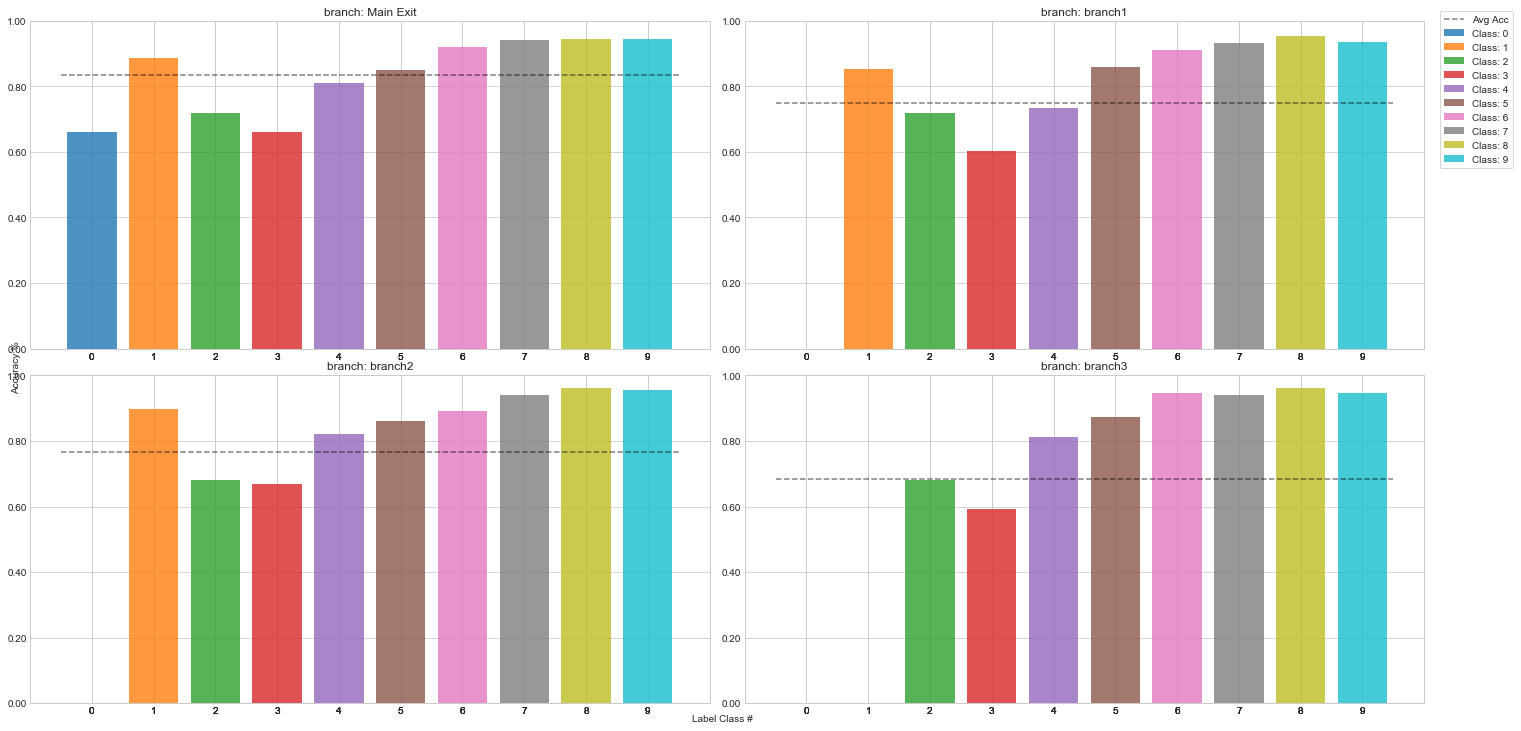

In [53]:
y = graphclassAccuracy(pred, labels, 4,list(range(10)), ["Main Exit","branch1","branch2","branch3","branch4","branch5","branch7"])

#### something is clearly werid with the 0 class. I need to figure out what is happening.

From  testing with reorganizing the classes around, I discovered that it is not actually the class that is causing the disapearance from the results, but something else. When I swaped the 0 and 6 classes around in the training data and trained a new model, which outputted labels_alt, the new 0 class still is completely missing from the branches
<br>
This means that something elsewhere, is causing whatever is in the 0 class to be missed completely.


label classes[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
output: 0
number of classes 10
correct answer 842
correct [84, 79, 74, 74, 69, 66, 105, 95, 99, 97]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.8155339805825242, 0.8876404494382022, 0.74, 0.7184466019417476, 0.7666666666666667, 0.7674418604651163, 0.9375, 0.9313725490196079, 0.9339622641509434, 0.8899082568807339]
output: 1
number of classes 10
correct answer 575
correct [0, 66, 38, 42, 56, 43, 87, 75, 82, 86]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.0, 0.7415730337078652, 0.38, 0.4077669902912621, 0.6222222222222222, 0.5, 0.7767857142857143, 0.7352941176470589, 0.7735849056603774, 0.7889908256880734]
output: 2
number of classes 10
correct answer 710
correct [0, 72, 71, 69, 62, 61, 97, 87, 99, 92]
count [103, 89, 100, 103, 90, 86, 112, 102, 106, 109]
percentage [0.0, 0.8089887640449438, 0.71, 0.6699029126213593, 0.6888888888888889, 0.7093023255813954, 0.8660714285714286, 0.8529411764705882, 0

<Figure size 432x288 with 0 Axes>

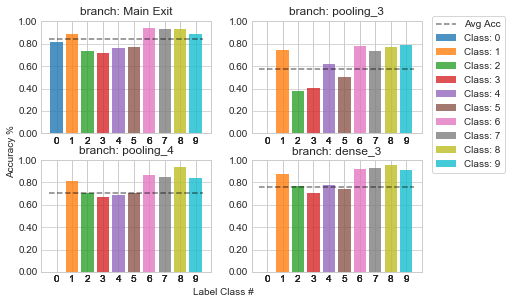

In [17]:
with open('results/labels_redo.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    labels = list(reader)
with open('results/predClasses_redo.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    pred = list(reader)
with open('results/predEntropy_redo.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    next(reader)
    entropy = list(reader)
y = graphclassAccuracy(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["Main Exit","pooling_3","pooling_4","dense_3"])

So when I tried doing a full training where it trained branches from the start, all the classes lost the 0 class. Perhaps it is happening in the branch training method that is causing this.
<br>
However when I did the mnist, it did work, so this means that it is something in my code to do with training branched models specifically in the alexnet version.
